<a href="https://colab.research.google.com/github/bdugick89/Data-Science-Bootcamp/blob/main/Brannon_Dugick_Project_1_Naive_Bayes_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Successful Transaction Predictions:
Project 1
Naives Bayes Binary Classification Transaction Data

---
Brannon Dugick - March 12, 2024


## Problem Definition


The goal In this project, we want to predict whether or not a future customer will make a transaction based on their transaction data.  This is a binary classification problem since the result is a binary answer like:is a customer satisfied? Will a customer buy this product? Can a customer pay this loan?.  This project will use Naive Bayes classification.  

## Data Collection/Sources


This data comes from [S3 Bucket Transactions](http://ddc-datascience.s3-website-us-west-1.amazonaws.com/Projects/Project.1-Transactions/Data/Transaction.train.csv).

The data has a shape of (180000, 53). The following is the data definition:

| Column | Description |
|--------|-------------|
| ID_code | Unique identifier for each record |
| target | Target variable |
| var_0 to var_49 | Descriptive variables |

The dataset is anonymized and contains one target column and 49 fields with a naming convention prefixed by `var_` followed by the column number in an ascending count from 0 to 49. All data is discrete values without the presence of any nulls.


### Imports

In [ ]:
import os
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

from sklearn import datasets, metrics, model_selection
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from statsmodels.graphics.gofplots import qqplot

### File Path

In [ ]:
base_path = 'http://ddc-datascience.s3-website-us-west-1.amazonaws.com/Projects/Project.1-Transactions/Data/'
train_file = 'Transaction.train.csv'
test_file = 'Transaction.train.csv'

###Concat Paths

In [ ]:
train_path = base_path + train_file
test_path = base_path + test_file

### Load Data into Data Frames

In [ ]:
train_orig = pd.read_csv(train_path)
test_orig = pd.read_csv(train_path)


##Data Profiling & Cleaning

In [ ]:

column_headers_series = pd.Series(train_orig.columns)
print(column_headers_series)


0     Unnamed: 0
1        ID_code
2         target
3          var_0
4          var_1
5          var_2
6          var_3
7          var_4
8          var_5
9          var_6
10         var_7
11         var_8
12         var_9
13        var_10
14        var_11
15        var_12
16        var_13
17        var_14
18        var_15
19        var_16
20        var_17
21        var_18
22        var_19
23        var_20
24        var_21
25        var_22
26        var_23
27        var_24
28        var_25
29        var_26
30        var_27
31        var_28
32        var_29
33        var_30
34        var_31
35        var_32
36        var_33
37        var_34
38        var_35
39        var_36
40        var_37
41        var_38
42        var_39
43        var_40
44        var_41
45        var_42
46        var_43
47        var_44
48        var_45
49        var_46
50        var_47
51        var_48
52        var_49
dtype: object


### Basic Profiling

In [ ]:
train_orig.head()


,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,train_0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,1,train_1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,2,train_2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,3,train_3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,4,train_4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974


In [ ]:
train_orig.tail()


,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
179995,179995,train_179995,0,8.9112,-4.4900,11.3795,5.4164,8.3309,14.1869,12.8219,...,5.9355,5.1764,-5.4817,20.7390,-0.8043,31.3663,8.7194,4.7839,0.9673,14.9529
179996,179996,train_179996,0,8.2722,7.1923,16.7300,4.9698,5.4907,14.0238,11.9933,...,5.3550,-1.5556,7.3839,9.9193,5.0860,28.0185,7.4145,4.2814,2.5575,15.3969
179997,179997,train_179997,0,12.4902,-2.9379,6.5901,4.7242,9.1423,13.9133,12.2314,...,6.0708,-0.3463,-5.0098,20.4807,5.9814,20.2668,3.1006,3.7701,0.1299,16.1256
179998,179998,train_179998,0,8.4894,0.7048,11.1518,4.6370,8.1321,14.2921,6.9582,...,5.5161,3.1774,-4.9374,23.6365,1.0432,29.9365,9.6381,6.9649,2.5546,15.6760
179999,179999,train_179999,0,11.6252,3.3959,11.5558,4.2003,7.4666,13.7381,12.9590,...,5.0415,-2.4210,-3.6829,14.2422,1.0741,26.3943,4.1482,11.9539,2.9846,15.6002


#### Meta Data

In [ ]:
train_orig.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180000 entries, 0 to 179999
Data columns (total 53 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  180000 non-null  int64  
 1   ID_code     180000 non-null  object 
 2   target      180000 non-null  int64  
 3   var_0       180000 non-null  float64
 4   var_1       180000 non-null  float64
 5   var_2       180000 non-null  float64
 6   var_3       180000 non-null  float64
 7   var_4       180000 non-null  float64
 8   var_5       180000 non-null  float64
 9   var_6       180000 non-null  float64
 10  var_7       180000 non-null  float64
 11  var_8       180000 non-null  float64
 12  var_9       180000 non-null  float64
 13  var_10      180000 non-null  float64
 14  var_11      180000 non-null  float64
 15  var_12      180000 non-null  float64
 16  var_13      180000 non-null  float64
 17  var_14      180000 non-null  float64
 18  var_15      180000 non-null  float64
 19  va

In [ ]:
train_orig.shape

(180000, 53)

In [ ]:
# Get summary statistics about each column
train_orig.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,180000.0,89999.500000,51961.668564,0.0000,44999.750000,89999.50000,134999.250000,179999.0000
target,180000.0,0.100222,0.300297,0.0000,0.000000,0.00000,0.000000,1.0000
var_0,180000.0,10.678650,3.041036,0.4084,8.451675,10.52675,12.756200,20.3150
var_1,180000.0,-1.630045,4.050519,-15.0434,-4.745600,-1.61125,1.360225,10.3768
var_2,180000.0,10.712922,2.639146,2.1171,8.720000,10.57960,12.514100,19.3530
var_3,180000.0,5.408688,0.866265,2.3473,4.768500,5.38560,6.003200,8.4477
var_4,180000.0,7.566953,1.235043,3.9705,6.618800,7.62850,8.583800,11.1506
var_5,180000.0,14.024017,0.190038,13.4346,13.893900,14.02550,14.164400,14.6545
var_6,180000.0,8.528080,4.641700,-6.0111,5.065750,8.59920,12.273300,22.3315
var_7,180000.0,15.243424,7.851050,-10.6642,9.170200,15.19890,21.010500,41.7480


All data are descrete values.

### Null Value Analysis

In [ ]:
train_orig.isna()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
179996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
179997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
179998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
train_orig.isnull().sum()*100

Unnamed: 0    0
ID_code       0
target        0
var_0         0
var_1         0
var_2         0
var_3         0
var_4         0
var_5         0
var_6         0
var_7         0
var_8         0
var_9         0
var_10        0
var_11        0
var_12        0
var_13        0
var_14        0
var_15        0
var_16        0
var_17        0
var_18        0
var_19        0
var_20        0
var_21        0
var_22        0
var_23        0
var_24        0
var_25        0
var_26        0
var_27        0
var_28        0
var_29        0
var_30        0
var_31        0
var_32        0
var_33        0
var_34        0
var_35        0
var_36        0
var_37        0
var_38        0
var_39        0
var_40        0
var_41        0
var_42        0
var_43        0
var_44        0
var_45        0
var_46        0
var_47        0
var_48        0
var_49        0
dtype: int64

No Null Values in entire record set

### Correct data type issues

with Strings present in features defined as floats.

In [ ]:
train_orig.drop(columns=['ID_code', 'Unnamed: 0'], inplace=True)


In [ ]:
train_orig.reset_index(drop=True, inplace=True)


#### Verify DDL operation

In [ ]:
train_orig.info()
## ID_Code & Unnamed: 0 has been removed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180000 entries, 0 to 179999
Data columns (total 51 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   target  180000 non-null  int64  
 1   var_0   180000 non-null  float64
 2   var_1   180000 non-null  float64
 3   var_2   180000 non-null  float64
 4   var_3   180000 non-null  float64
 5   var_4   180000 non-null  float64
 6   var_5   180000 non-null  float64
 7   var_6   180000 non-null  float64
 8   var_7   180000 non-null  float64
 9   var_8   180000 non-null  float64
 10  var_9   180000 non-null  float64
 11  var_10  180000 non-null  float64
 12  var_11  180000 non-null  float64
 13  var_12  180000 non-null  float64
 14  var_13  180000 non-null  float64
 15  var_14  180000 non-null  float64
 16  var_15  180000 non-null  float64
 17  var_16  180000 non-null  float64
 18  var_17  180000 non-null  float64
 19  var_18  180000 non-null  float64
 20  var_19  180000 non-null  float64
 21  var_20  18

## Exploratory Data Analysis


### Feature Correlation

#### Pair Plot

#### Heat Map

<Axes: >

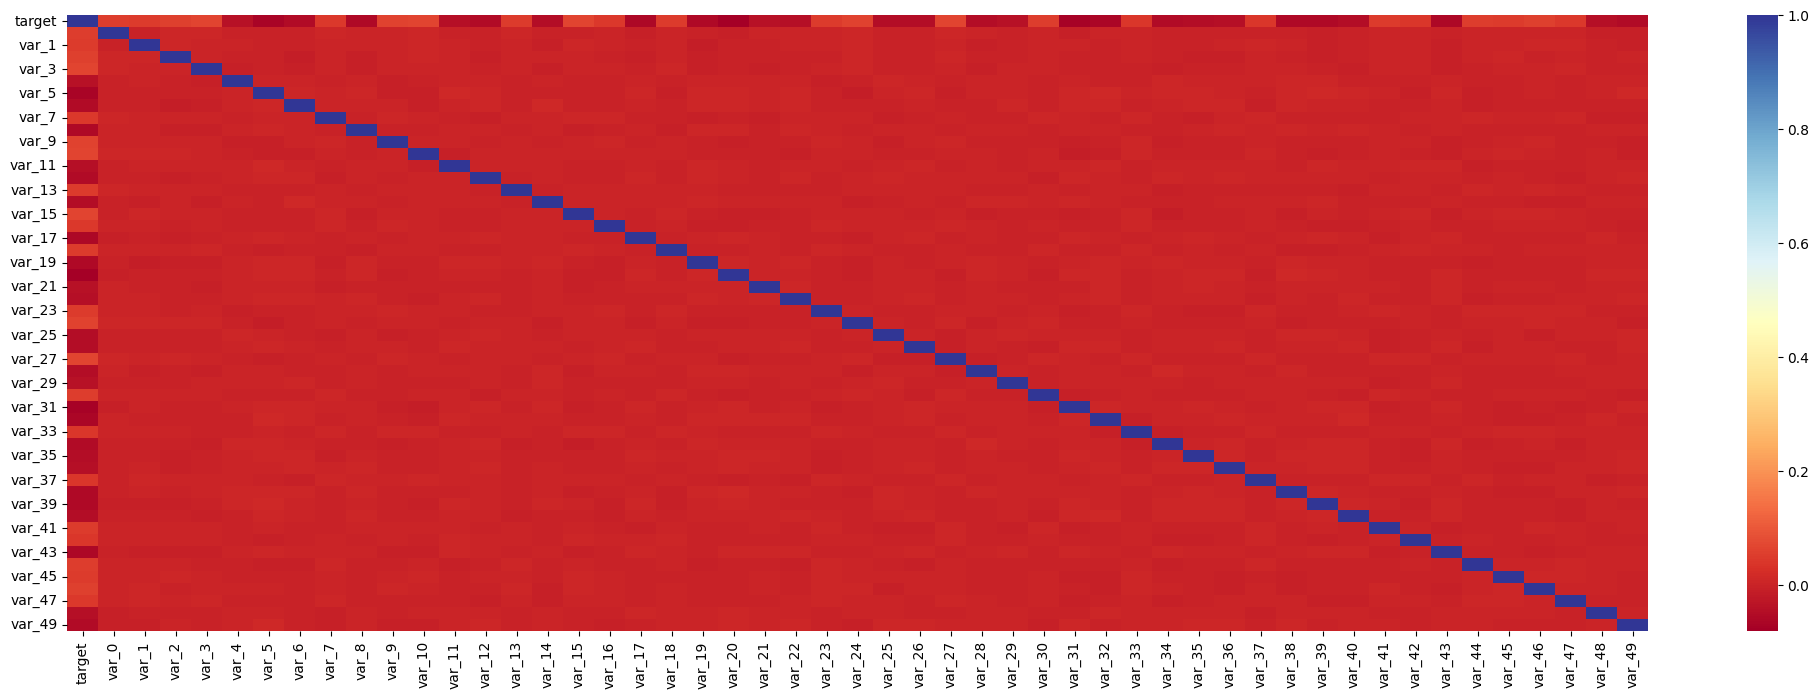

In [ ]:
# Calculate the width based on the number of columns
width = 0.5 * train_orig.shape[1]
corr = train_orig.corr()
# Set the figure size
plt.figure(figsize=(width, 8))

# Plot the heatmap
sns.heatmap(corr, cmap='RdYlBu', annot=False)


In [ ]:
corr_unstacked = corr.unstack()
corr_unstacked

target  target    1.000000
        var_0     0.052904
        var_1     0.049916
        var_2     0.055450
        var_3     0.066924
                    ...   
var_49  var_45   -0.003859
        var_46   -0.001607
        var_47   -0.000892
        var_48    0.003141
        var_49    1.000000
Length: 2601, dtype: float64

In [ ]:
corr_unstacked_not_self = corr_unstacked[ corr_unstacked !=1 ]
corr_unstacked_not_self

target  var_0     0.052904
        var_1     0.049916
        var_2     0.055450
        var_3     0.066924
        var_4    -0.042073
                    ...   
var_49  var_44    0.000081
        var_45   -0.003859
        var_46   -0.001607
        var_47   -0.000892
        var_48    0.003141
Length: 2550, dtype: float64

In [ ]:
corr_unstacked_not_self['target'].abs().sort_values(ascending = False)


var_20    0.080689
var_31    0.073296
var_5     0.070015
var_3     0.066924
var_27    0.064868
var_32    0.063871
var_10    0.063565
var_15    0.062887
var_43    0.061291
var_17    0.059906
var_24    0.059306
var_9     0.059227
var_8     0.057378
var_39    0.057373
var_19    0.057320
var_46    0.056902
var_38    0.055704
var_2     0.055450
var_6     0.054375
var_34    0.053733
var_0     0.052904
var_30    0.052457
var_12    0.052324
var_49    0.051718
var_44    0.051110
var_26    0.050278
var_40    0.050049
var_1     0.049916
var_28    0.049551
var_13    0.049072
var_14    0.048623
var_18    0.048392
var_35    0.048198
var_41    0.047948
var_23    0.047569
var_45    0.047543
var_25    0.047005
var_22    0.046433
var_11    0.045516
var_36    0.045513
var_47    0.045506
var_16    0.045281
var_7     0.044769
var_48    0.042765
var_4     0.042073
var_29    0.041987
var_42    0.041593
var_33    0.040520
var_21    0.040311
var_37    0.040147
dtype: float64

In [ ]:
# An alternative method for finding the most highly correlated features
corr = train_orig.corr().abs()
corr = corr.melt(
    ignore_index = False,
    var_name = 'feature',
    value_name = 'correlation',
    )
corr = corr[corr['correlation'] != 1]
corr.sort_values(
    'correlation',
    inplace=True,
    ascending=False,
    )
corr[::2].head(10)

,feature,correlation
var_20,target,0.080689
target,var_31,0.073296
var_5,target,0.070015
target,var_3,0.066924
target,var_27,0.064868
target,var_32,0.063871
var_10,target,0.063565
target,var_15,0.062887
var_43,target,0.061291
var_17,target,0.059906


#### High Correlation Ranked


| Rank | Var |
|------|-----|
| 1.   | 20  |
| 2.   | 31  |
| 3.   | 5  |
| 4.   | 3   |
| 5.   | 27   |
| 6.   | 10  |
| 7.   | 15  |




### Overall Average Target

In [ ]:
train_orig['target'].value_counts()

0    161960
1     18040
Name: target, dtype: int64

In [ ]:
sum(train_orig['target'])*100/len(train_orig['target'])

10.022222222222222

In [ ]:
for field in ['var_20', 'var_31', 'var_5', 'var_3', 'var_27', 'var_10', 'var_15']:
    all = train_orig.loc[train_orig['target'] == 1, field]
    target = sum(all)
    total = len(all)
    rate = target*100/total
    print("%s Percent target: %d \n Total target: %d. Total count: %d. \n" % (field, rate, target, total))

var_20 Percent target: 1416 
 Total target: 255539. Total count: 18040. 

var_31 Percent target: 607 
 Total target: 109631. Total count: 18040. 

var_5 Percent target: 1398 
 Total target: 252274. Total count: 18040. 

var_3 Percent target: 558 
 Total target: 100706. Total count: 18040. 

var_27 Percent target: 625 
 Total target: 112901. Total count: 18040. 

var_10 Percent target: -291 
 Total target: -52650. Total count: 18040. 

var_15 Percent target: 615 
 Total target: 110980. Total count: 18040. 



## Processing


##Gaussian Naive Bayes Modeling- Unbalanced 1

In [ ]:
gnb = GaussianNB()
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets, metrics, model_selection

#### Separate our features and targets.

In [ ]:
y = train_orig['target'].copy()
X = train_orig.drop('target', axis=1, inplace=False)

In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [ ]:
y.shape

(180000,)

In [ ]:
X.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,4.2840,16.2191,2.5791,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,7.8000,2.7407,8.5524,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,4.7011,18.1377,1.2145,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,15.9426,12.5579,6.8202,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,6.5263,18.9608,10.1102,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974


In [ ]:
X.shape

(180000, 50)

###Split into Train 0 & 1

In [ ]:
transact_train_target_0 = train_orig[train_orig['target'] == 0].copy()
transact_train_target_0.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,4.2840,16.2191,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,7.8000,2.7407,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,4.7011,18.1377,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,15.9426,12.5579,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,6.5263,18.9608,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974


In [ ]:
transact_train_target_1 = train_orig[train_orig['target'] == 1].copy()
transact_train_target_1.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
13,1,16.3699,1.5934,16.7395,4.8222,8.6978,13.7999,2.7925,14.3984,19.4258,...,5.6656,3.5750,-2.2723,15.7383,8.5618,11.8982,7.4002,7.4031,4.3989,15.6064
29,1,5.3301,-2.6064,13.1913,5.9064,9.1168,14.0957,12.3335,1.6610,13.0446,...,5.4183,8.6643,4.1428,4.7056,4.3694,16.4554,5.9215,7.9676,2.3405,17.4105
63,1,7.7072,0.0183,9.9974,6.0425,6.6710,14.0503,9.0144,-2.3445,23.5101,...,6.0669,2.5841,2.2445,23.1283,2.9384,27.6213,1.5832,5.0039,3.8814,15.7685
65,1,10.5358,-2.5439,8.7394,5.1584,9.0358,13.6021,4.2864,13.8723,2.2106,...,6.1149,2.2550,-7.2104,19.7545,6.3190,11.9410,4.6648,6.4227,3.4025,15.1340
71,1,6.7547,2.5973,14.2141,4.2336,9.1282,13.9394,3.6480,24.2658,33.3687,...,5.0565,11.9429,0.3140,20.4828,7.9488,11.2587,1.4677,3.5935,2.0013,18.9013


###Fit,Predict, Train

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 36000 points : 3281


###Initial Results

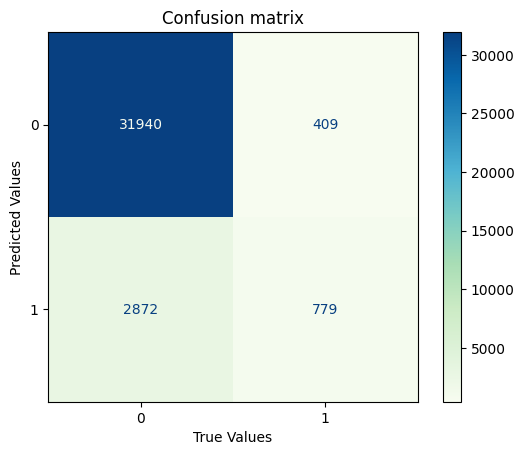

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    cmap='GnBu',
)
plt.grid(False)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title('Confusion matrix') ;


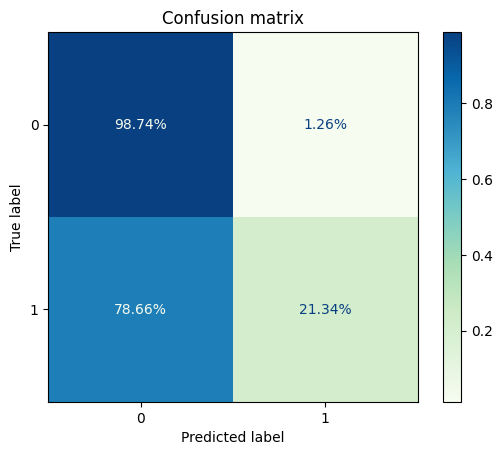

In [ ]:
metrics.ConfusionMatrixDisplay.from_estimator(
    gnb,
    X_test,
    y_test,
    normalize = 'true',
    values_format = '.2%',
    cmap = 'GnBu',
    )
plt.grid(False)
plt.title('Confusion matrix') ;
plt.savefig('confusion_matrix.png')

### Cross-Validation


In [ ]:
def cross_validate(X, y, num_loops):
  """Randomly splits X and y values into train/test groups (test size = 20%).
  Creates a GaussianNB model.
  Returns a numpy array of accuracy scores for the tests.
  """

  accuracy_scores = np.zeros(num_loops)

  for i in range(num_loops):
    model_split_cv = GaussianNB()
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)
    model_split_cv.fit(X_train, y_train)
    y_split_pred = model_split_cv.predict(X_test)
    accuracy_scores[i] = metrics.accuracy_score(y_test, y_split_pred)

  return accuracy_scores

In [ ]:
accuracy_scores = cross_validate(X, y, 100)
print(round(accuracy_scores.mean(), 5))

0.91098


###Accuracy Score

We are seeing an accuracy score of 91% for 100 runs.

## Guassian Naives Bays Modeling- Balanced 2

Create a balance data frame with equal amount of 0 and 1s for our target by taking out random samples of each class to create a new data frame.

In [ ]:
sample_count = transact_train_target_1.shape[0]
sample_count

18040

## Federate data frames

In [ ]:
transact_train_balanced = pd.concat([transact_train_target_0.sample(n=sample_count, random_state=42), transact_train_target_1])
transact_train_balanced.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
80859,0,12.1309,3.7023,10.6870,4.8607,8.3384,14.0598,10.4503,20.2311,14.3418,...,5.1105,7.3679,1.6603,14.3169,2.4792,12.6246,8.0895,9.0333,-0.8285,16.2125
109717,0,12.7841,1.6487,13.6093,5.4508,6.9768,14.0315,7.7062,15.2112,14.8516,...,6.1045,-3.8136,6.0848,17.3155,5.6732,9.5605,-1.9631,10.6872,3.3487,10.8504
101363,0,14.1356,-1.5536,8.8026,4.2596,6.0682,14.3595,6.4783,21.7879,11.2882,...,5.7449,1.3742,7.1982,22.9952,1.3705,-2.2522,9.1098,11.7496,0.9344,18.2137
31967,0,9.1378,4.3576,11.1524,5.6191,9.0943,14.1932,9.3744,20.7422,14.9814,...,6.0328,0.3656,0.3035,21.0027,0.2591,17.2723,-0.4296,3.1559,2.0230,19.8078
166320,0,8.6641,1.3106,8.7793,5.9572,8.8266,13.8616,7.9522,16.0807,32.0387,...,6.0227,-5.1135,-0.8195,18.0469,0.0150,31.3485,2.0435,5.2614,4.0196,18.4218


In [ ]:
transact_train_balanced.shape

(36080, 51)

In [ ]:
gnb_2 = GaussianNB()

###Splits target from predictions

In [ ]:
y_balanced = transact_train_balanced['target'].copy()
X_balanced = transact_train_balanced.drop('target', axis=1, inplace=False)

In [ ]:
X_balanced_train, X_balanced_test, y_balanced_train, y_balanced_test = train_test_split(X_balanced, y_balanced, test_size=0.20, random_state=42)
gnb_2.fit(X_balanced_train, y_balanced_train)
y_balanced_pred = gnb_2.predict(X_balanced_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_balanced_test.shape[0], (y_balanced_test != y_balanced_pred).sum()))

Number of mislabeled points out of a total 7216 points : 1725


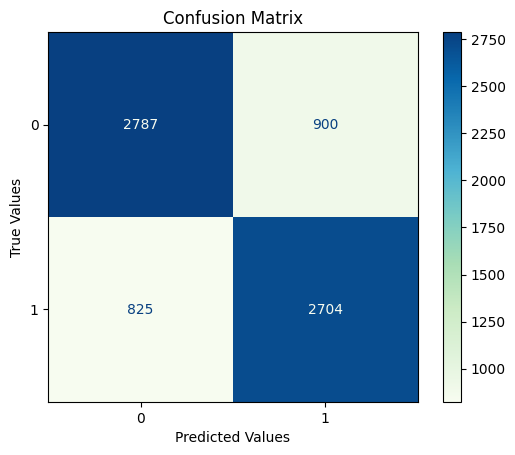

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(
    y_balanced_pred,
    y_balanced_test,
    cmap='GnBu',
)
plt.grid(False)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.title('Confusion Matrix') ;

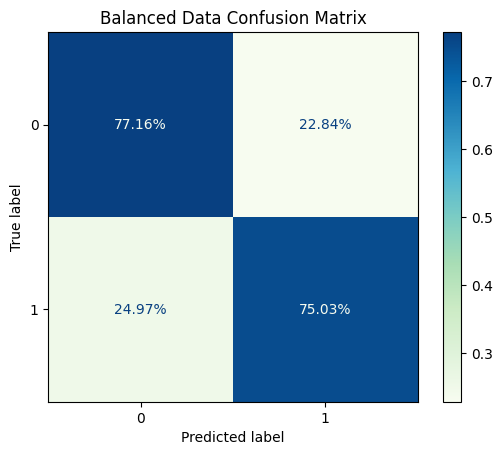

In [ ]:
metrics.ConfusionMatrixDisplay.from_estimator(
  gnb_2,
  X_balanced_test,
  y_balanced_test,
  normalize = 'true',
  values_format = '.2%',
  cmap = 'GnBu',
)
plt.grid(False)
plt.title('Balanced Data Confusion Matrix') ;
plt.savefig('balanced_data_confusion_matrix.png')

We can see that our model is performing better at predicting when the data is balanced vs not.

### Cross Functional Accuracy Score

The accuracy score dropped to 75% from 91 but the confusion matrix is much more balanced showing the pr

In [ ]:
balanced_data_accuracy_scores = cross_validate(X_balanced, y_balanced, 100)
print(round(balanced_data_accuracy_scores.mean(), 5))

0.75873


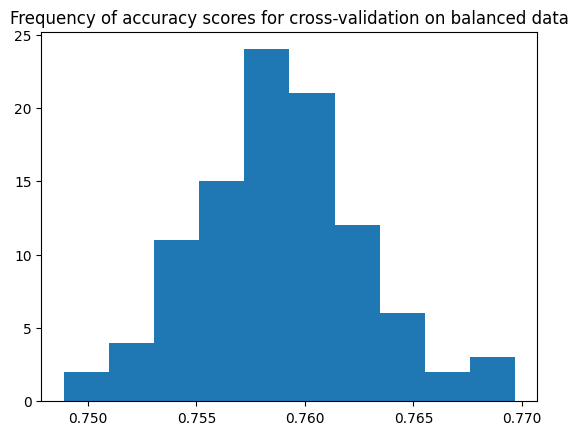

In [ ]:
plt.hist(balanced_data_accuracy_scores, bins=10)
plt.title('Frequency of accuracy scores for cross-validation on balanced data')
plt.savefig('balanced_data_accuracy_scores.png')

## Data Visualization/Communication of Results


## Conclusion

### Important features

We saw that var_20 and var_5 were the most important factors of predicting the target.

### Model performance

- Using Naive Bayes resulted in an average accuracy of 75% after a score of 91 when our data was inbalanced.
- Several of our features are correlated with each other so this may not be an ideal method to use.

### Future exploration/ Next steps

- Understand if our data is truley normally distributed.
- It would be worth exploring alternative models like a random forest and see how that did compared to Naive Bayes.  
- Further feature engineering may also be helpful to see if we can have performance gains, as having 50 features is a lot. It reduces our ability to run pair plotting and other correlation matrices due to the computational nature of such a large feature set.
